##  Random Forest algorithm intuition


Random forest algorithm intuition can be divided into two stages. 


In the first stage, we randomly select “k” features out of total `m` features and build the random forest. In the first stage, we proceed as follows:-

1.	Randomly select `k` features from a total of `m` features where `k < m`.
2.	Among the `k` features, calculate the node `d` using the best split point.
3.	Split the node into daughter nodes using the best split.
4.	Repeat 1 to 3 steps until `l` number of nodes has been reached.
5.	Build forest by repeating steps 1 to 4 for `n` number of times to create `n` number of trees.


In the second stage, we make predictions using the trained random forest algorithm. 

1.	We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.
2.	Then, we calculate the votes for each predicted target.
3.	Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm.


##  The problem statement


The problem is to predict the best optimization method from the list `SGD` , `SGD_momentum` , `Nesterov` , `RMSprop`, `Adagrad` , `Adadelta` , `Adam` , `AMSGrad` , `AdamW` , `Yogi`, `Nadam` , `Adamax`.


##  Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

##  Import dataset

In [40]:
data = 'neural_network_results-15-05.csv'

df = pd.read_csv(data)

##  Exploratory data analysis


Now, I will explore the data to gain insights about the data. 

In [41]:
# view dimensions of dataset

df.shape

(204, 14)

We can see that there are 1728 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [42]:
# preview the dataset

df.head()

,Data Name,Data Size,Number of Features,Target Feature Type,Neural Network Architecture,Optimization Method,Test Accuracy,Precision,Recall,F1-score,Convergence Speed,Training Time,Training Loss,Validation Loss
0,Aquatic mammals,1200,32,float32,CNN,SGD,0.650000,0.649221,0.650000,0.647125,46,12.449574,1.608842,1.584503
1,Aquatic mammals,1200,32,float32,CNN,SGD_momentum,0.690000,0.694327,0.690000,0.688689,20,5.578527,1.425587,1.331133
2,Aquatic mammals,1200,32,float32,CNN,Nesterov,0.713333,0.713975,0.713333,0.709880,28,7.265174,1.502383,1.802368
3,Aquatic mammals,1200,32,float32,CNN,RMSprop,0.743333,0.748176,0.743333,0.743622,36,11.388428,1.379714,1.081847
4,Aquatic mammals,1200,32,float32,CNN,Adagrad,0.616667,0.616211,0.616667,0.615100,50,12.761535,1.620451,1.607689


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [43]:
# col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


# df.columns = col_names

# col_names

In [44]:
# # let's again preview the dataset

# df.head()

We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data Name                    204 non-null    object 
 1   Data Size                    204 non-null    int64  
 2   Number of Features           204 non-null    int64  
 3   Target Feature Type          204 non-null    object 
 4   Neural Network Architecture  204 non-null    object 
 5   Optimization Method          204 non-null    object 
 6   Test Accuracy                204 non-null    float64
 7   Precision                    204 non-null    float64
 8   Recall                       204 non-null    float64
 9   F1-score                     204 non-null    float64
 10  Convergence Speed            204 non-null    int64  
 11  Training Time                204 non-null    float64
 12  Training Loss                204 non-null    float64
 13  Validation Loss     

### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [46]:
col_names = ['Data Name', 'Target Feature Type', 'Neural Network Architecture', 'Optimization Method']


for col in col_names:
    
    print(df[col].value_counts())   


Data Name
Aquatic mammals                                 24
Burned Forest Fires                             12
Customer Churn                                  12
Diabete                                         12
Diabetic-Prediction                             12
Flowers                                         12
Food Container                                  12
Fruit and Vegetables                            12
Mobile Price                                    12
Mushroom                                        12
Student Admission                               12
Predictive-Meintenance                          12
Productivity Prediction of Garment Employees    12
Room Occupancy Estimation                       12
Titanic                                         12
Vehicle                                         12
Name: count, dtype: int64
Target Feature Type
float32        108
int32           24
int64           24
Categorical     24
float64         24
Name: count, dtype: int64
Neural 

### Summary of variables


- There are 14 variables in the dataset. 4 of  the variables are of categorical data type and the remaining 10 are float and integer data types.


- These are given by `Data Name`, `Target Feature Type`, `Neural Network Architecture`, `Optimization Method`, `Data Size`, `Number of Features` , `Test Accuracy` , `Precision`, `Recall`, `F1-score` , `Convergence Speed` , `Training Time` , `Training Loss` and  `Validation Loss`.


- `Optimization Method` is the target variable.

### Explore `class` variable

In [47]:
df['Optimization Method'].value_counts()

Optimization Method
SGD             17
SGD_momentum    17
Nesterov        17
RMSprop         17
Adagrad         17
Adadelta        17
Adam            17
AMSGrad         17
AdamW           17
Yogi            17
Nadam           17
Adamax          17
Name: count, dtype: int64

The `Optimization Method` target variable is nominal in nature.

### Missing values in variables

In [48]:
# check missing values in variables

df.isnull().sum()

Data Name                      0
Data Size                      0
Number of Features             0
Target Feature Type            0
Neural Network Architecture    0
Optimization Method            0
Test Accuracy                  0
Precision                      0
Recall                         0
F1-score                       0
Convergence Speed              0
Training Time                  0
Training Loss                  0
Validation Loss                0
dtype: int64

We can see that there are no missing values in the dataset. 

##  Declare feature vector and target variable

In [49]:
X = df.drop(['Optimization Method', 'Data Name'], axis=1)

y = df['Optimization Method']

##  Split data into separate training and test set

In [50]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [51]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((136, 12), (68, 12))

##  Feature Engineering


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [52]:
# check data types in X_train

X_train.dtypes

Data Size                        int64
Number of Features               int64
Target Feature Type             object
Neural Network Architecture     object
Test Accuracy                  float64
Precision                      float64
Recall                         float64
F1-score                       float64
Convergence Speed                int64
Training Time                  float64
Training Loss                  float64
Validation Loss                float64
dtype: object

In [89]:
X_train.columns

Index(['Data Name', 'Data Size', 'Number of Features', 'Target Feature Type',
       'Test Accuracy', 'Precision', 'Recall', 'F1-score', 'Convergence Speed',
       'Training Time', 'Training Loss', 'Validation Loss'],
      dtype='object')

### Encode categorical variables


Now, I will encode the categorical variables.

In [53]:
X_train.head()

,Data Size,Number of Features,Target Feature Type,Neural Network Architecture,Test Accuracy,Precision,Recall,F1-score,Convergence Speed,Training Time,Training Loss,Validation Loss
75,2000,32,float32,CNN,0.786000,0.792073,0.786000,0.784453,23,10.205404,1.129338,0.884397
197,2000,32,float32,CNN,0.542000,0.592218,0.542000,0.526297,50,61.558113,1.614892,1.613740
139,320,7,float32,FNN,0.850000,0.850000,0.850000,0.850000,27,4.058272,0.696154,0.688331
51,20470,26,Categorical,LSTM,0.623258,0.525845,0.623258,0.569201,46,258.734832,0.959436,0.880651
122,4874,102,int32,FNN,1.000000,1.000000,1.000000,1.000000,50,36.344194,0.533024,0.177616


We can see that three of the variables are categorical data type.

In [54]:
!pip install category_encoders

In [55]:
# import category encoders

import category_encoders as ce

In [56]:
# encode categorical variables with nominal encoding

encoder = ce.OrdinalEncoder(cols=[ 'Target Feature Type', 'Neural Network Architecture'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [57]:
X_train.head()

,Data Size,Number of Features,Target Feature Type,Neural Network Architecture,Test Accuracy,Precision,Recall,F1-score,Convergence Speed,Training Time,Training Loss,Validation Loss
75,2000,32,1,1,0.786000,0.792073,0.786000,0.784453,23,10.205404,1.129338,0.884397
197,2000,32,1,1,0.542000,0.592218,0.542000,0.526297,50,61.558113,1.614892,1.613740
139,320,7,1,2,0.850000,0.850000,0.850000,0.850000,27,4.058272,0.696154,0.688331
51,20470,26,2,3,0.623258,0.525845,0.623258,0.569201,46,258.734832,0.959436,0.880651
122,4874,102,3,2,1.000000,1.000000,1.000000,1.000000,50,36.344194,0.533024,0.177616


In [58]:
X_test.head()

,Data Size,Number of Features,Target Feature Type,Neural Network Architecture,Test Accuracy,Precision,Recall,F1-score,Convergence Speed,Training Time,Training Loss,Validation Loss
15,309,28,3,2,0.923077,0.925379,0.923077,0.919922,50,8.966100,4.806965,3.155367
9,1200,32,1,1,0.663333,0.676444,0.663333,0.653038,22,11.597512,1.313802,1.218966
115,1600,20,5,2,0.954225,0.954183,0.954225,0.954204,40,12.260745,1.527735,1.362028
78,2000,32,1,1,0.804000,0.801917,0.804000,0.801621,23,8.529217,1.120819,0.847343
66,2000,32,1,1,0.806000,0.814501,0.806000,0.806624,23,10.154078,1.315050,1.092803


We now have training and test set ready for model building. 

In [59]:
encoder = ce.OrdinalEncoder(cols=['Optimization Method'])


y_train = encoder.fit_transform(y_train)

y_test = encoder.transform(y_test)

In [60]:
y_train.head()

,Optimization Method
75,1
197,2
139,3
51,1
122,4


##  Random Forest Classifier model with default parameters

In [61]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.2059


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, I have used 10 decision-trees to build the model. Now, I will decrese the number of decision-trees and see its effect on accuracy.

## 14. Random Forest Classifier model with parameter n_estimators=4

In [74]:
# instantiate the classifier with n_estimators = 4

rfc_4 = RandomForestClassifier(n_estimators= 9, random_state=42)



# fit the model to the training set

rfc_4.fit(X_train, y_train)



# Predict on the test set results

y_pred_4 = rfc_4.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 4 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_4)))

Model accuracy score with 4 decision-trees : 0.2059


##  Find important features with Random Forest model


Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy. 


First, I will create the Random Forest model as follows:-

In [75]:
# create the classifier with n_estimators = 4

clf = RandomForestClassifier(n_estimators=4, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=4, random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [76]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Training Time                  0.146365
Validation Loss                0.143444
Training Loss                  0.142675
F1-score                       0.111080
Convergence Speed              0.109223
Precision                      0.105606
Test Accuracy                  0.069142
Recall                         0.066816
Data Size                      0.032751
Number of Features             0.028604
Target Feature Type            0.025421
Neural Network Architecture    0.018874
dtype: float64

We can see that the most important feature is `F1-score` and least important feature is `Target Feature Type`.

## 16. Visualize the feature scores of the features


Now, I will visualize the feature scores with matplotlib and seaborn.

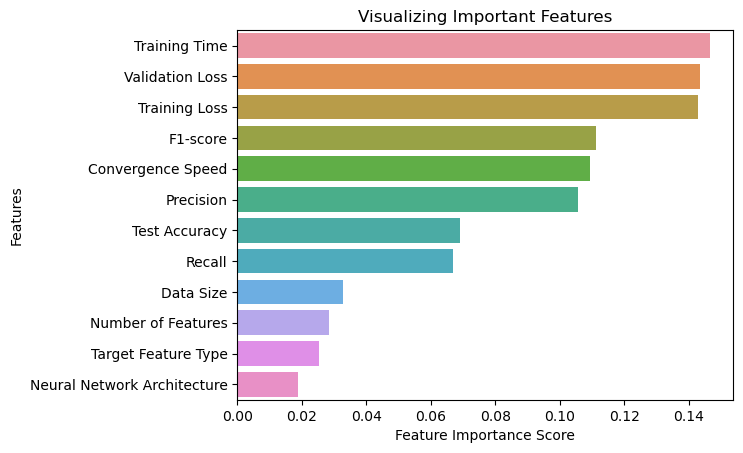

In [77]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [94]:
from sklearn.tree import plot_tree
from sklearn.compose import ColumnTransformer

In [97]:
# Plotting one of the trees in the Random Forest
plt.figure(figsize=(20,15))
plot_tree(clf.estimators_[0], feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

<Figure size 2000x1500 with 0 Axes>

##  Build the Random Forest model on selected features


Now, I will drop the least important `Target Feature Type` from the model, rebuild the model and check its effect on accuracy.

In [84]:
# declare feature vector and target variable

X = df.drop(['Optimization Method', 'Neural Network Architecture'], axis=1)

y = df['Optimization Method']

In [85]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


Now, I will build the random forest model and check accuracy.

In [86]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Target Feature Type'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [87]:
encoder = ce.OrdinalEncoder(cols=['Optimization Method'])


y_train = encoder.fit_transform(y_train)

y_test = encoder.transform(y_test)

In [88]:
# instantiate the classifier with n_estimators = 4

clf = RandomForestClassifier(n_estimators = 4, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


ValueError: could not convert string to float: 'Flowers'

##  Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [38]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[1 1 3 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 4 0 0 0 0]
 [2 1 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 1 0 0]
 [2 0 1 0 0 0 0 2 0 0 0 0]
 [0 0 1 1 0 1 0 1 0 0 0 1]
 [1 0 2 1 0 1 1 1 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 0]
 [0 1 1 0 0 0 0 1 1 0 0 0]
 [0 0 2 0 0 0 1 2 0 0 1 0]
 [1 0 2 0 0 0 1 3 0 2 0 0]
 [1 0 1 0 0 1 0 0 0 0 0 3]]


##  Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.11      0.20      0.14         5
           2       0.25      0.14      0.18         7
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.33      0.20      0.25         5
           7       0.33      0.12      0.18         8
           8       0.06      0.50      0.11         2
           9       1.00      0.25      0.40         4
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         9
          12       0.75      0.50      0.60         6

    accuracy                           0.14        64
   macro avg       0.24      0.16      0.16        64
weighted avg       0.24      0.14      0.16        64



In [1]:
from graphviz import Digraph

# Create a new Digraph
dot = Digraph()

# Define the decision rules
dot.node('A', 'Training Time < threshold')
dot.node('B', 'Validation Loss < threshold')
dot.node('C', 'Training Loss < threshold')
dot.node('D', 'F1-score > threshold')
dot.node('E', 'Convergence Speed > threshold')
dot.node('F', 'Precision > threshold')
dot.node('G', 'Test Accuracy > threshold')
dot.node('H', 'Recall > threshold')
dot.node('I', 'Data Size > threshold')
dot.node('J', 'Number of Features > threshold')
dot.node('K', 'Target Feature Type = type')
dot.node('L', 'Neural Network Architecture = architecture')
dot.node('M', 'Select Best Method')

# Add edges
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI', 'IJ', 'JK', 'KL', 'LM'])

# Render the decision tree
dot.render('decision_tree', format='png', view=True)

ModuleNotFoundError: No module named 'graphviz'